## Basic Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data cleaning

In [8]:
comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')
comments.head()

C:\Users\ritik\AppData\Local\Temp\ipykernel_8612\1208460801.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [9]:
print('Total nulls:\n', comments.isna().sum())
try:
    comments.dropna(inplace=True)
    print('Nulls have been deleted')
    pass
except:
    print('Deleting null rows failed')
    pass

Total nulls:
 video_id         0
comment_text    26
likes            0
replies          0
dtype: int64
Nulls have been deleted


In [11]:
comments.shape

(691374, 4)

## Sentiment Analysis

### Use Text Blob to get the polarity of the text so we can create a data frame of positive comments and negative comments

In [12]:
from textblob import TextBlob

In [13]:
sample_count = 10000
sample_df = comments[0:sample_count]
sample_df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
9996,lwOQbMcXtfU,All the people saying a Tsunami is coming... 🙄,0,0
9997,lwOQbMcXtfU,Lools like the glowing sea in fallout,0,0
9998,lwOQbMcXtfU,The Simpsons were right again!,0,0
9999,lwOQbMcXtfU,So is the water back?,0,0


In [14]:
polarity = []

for comment in sample_df['comment_text']:
    polarity.append(TextBlob(str(comment)).sentiment.polarity)


In [15]:
sample_df['polarity'] = polarity

C:\Users\ritik\AppData\Local\Temp\ipykernel_8612\2266223824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['polarity'] = polarity


In [16]:
positive = sample_df['polarity'] == 1
comments_positive = sample_df[positive]
negative = sample_df['polarity'] == -1
comments_negative = sample_df[negative]

## Word Cloud Analysis

### Use word cloud to create a visual representation of the most common used words in positive and negative comments

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
total_comment_positive = ' '.join(comments_positive['comment_text'])
total_comment_negative = ' '.join(comments_negative['comment_text'])
wordcloud_positive = WordCloud(stopwords=STOPWORDS).generate(total_comment_positive)
wordcloud_negative = WordCloud(stopwords=STOPWORDS).generate(total_comment_negative)


(-0.5, 399.5, 199.5, -0.5)

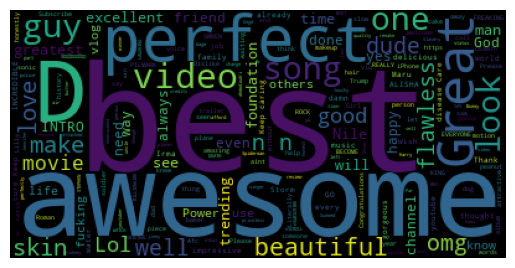

In [21]:
plt.imshow(wordcloud_positive)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

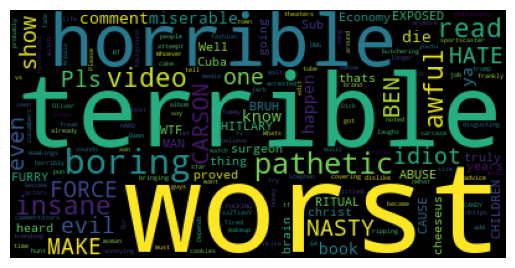

In [22]:
plt.imshow(wordcloud_negative)
plt.axis('off')

### Words like awesome, best, and perfect are the most common words in positive comment while terrible, worst, and horrible are the most common in negative comments

## Emoji Analysis

### Use the emoji library to see which are the most used emojis in the comments data.

In [23]:
import emoji

In [24]:
emoji.__version__

'2.10.1'

In [25]:
sample_df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [26]:
emojis = [char for comment in sample_df['comment_text'] for char in comment if char in emoji.EMOJI_DATA]

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128150 (\N{SPARKLING HEART}) missing from current font.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128149 (\N{TWO HEARTS}) missing from current font.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.



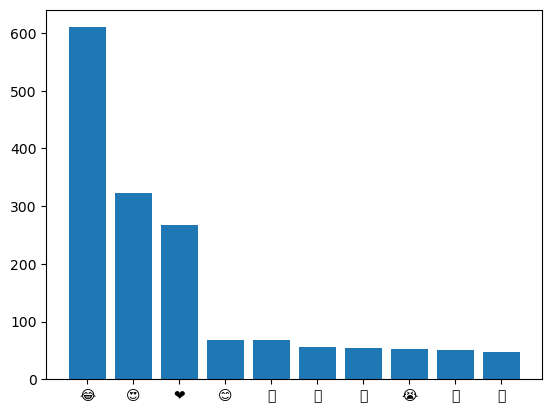

In [35]:
data = pd.DataFrame(emojis, columns=['emoji'])
emoji_count = data.groupby('emoji')['emoji'].count()
emoji_count.sort_values(ascending=False, inplace=True)
plt.bar(emoji_count.index[0:10], emoji_count.values[0:10])
plt.show()

### Using the default plotting in matplotlib has issues showing all the emojis, and the plot is not visually appealing, using the plotly library can help with this issue.

In [28]:
from collections import Counter

In [29]:
emoji_list = Counter(emojis).most_common(10)

In [30]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [31]:
e = [emoji_list[i][0] for i in range(len(emoji_list)) ]
f = [emoji_list[i][1] for i in range(len(emoji_list)) ]

In [32]:
trace = go.Bar(x=e, y=f)

In [33]:
iplot([trace])

### The most common emojis all seem positive, this may indicate that the use of emoji's most likely means that the comment will be positive

## Exploring the data from all countries

In [36]:
import os

In [37]:
files = os.listdir('additional_data')

In [44]:
files_csv = [file for file in files if 'csv' in file and 'videos' in file]

In [45]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [46]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [47]:
path = 'additional_data/'
full_data = pd.DataFrame()
for fileName in files_csv:
    country = pd.read_csv(path + fileName, encoding='iso-8859-1', on_bad_lines='skip')
    full_data = pd.concat([full_data,country])

In [48]:
full_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [50]:
print(full_data.shape)
print('Total duplicate rows: ',full_data.duplicated().sum())

(375942, 16)
Total duplicate rows:  36417


In [51]:
try:
    full_data.drop_duplicates(inplace=True)
    full_data.reset_index(inplace=True)
    print('Duplicates have successfully been deleted')
    pass
except:
    print('Deleting duplicate failed')
    pass


Duplicates have successfully been deleted


In [52]:
full_data.shape

(339525, 17)

In [53]:
path

'additional_data/'

In [55]:
new_data_path = path + 'youtube_sample.csv'
if os.path.exists(new_data_path):
    os.remove(new_data_path)
    full_data.to_csv(new_data_path, index=False)
else:
    full_data.to_csv(new_data_path, index=False)

In [155]:
from sqlalchemy import create_engine
# import mysql.connector

In [163]:
# Replace these values with your database connection details
host = 'localhost'
database = 'reallifeproject'
user = 'ritik'
password = 'password'
port = '3306'

def export_dataframe_to_mysql(dataframe, host, database, user, password):
    try:
        # Create an SQLAlchemy engine
        engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

        # Write the DataFrame to MySQL
        dataframe.to_sql(name='your_table', con=engine, if_exists='replace', index=False)

        print("DataFrame exported to MySQL successfully")

    except Exception as e:
        print(f"Error: {e}")

# Call the function with your parameters
export_dataframe_to_mysql(full_data[0:100], host, database, user, password)

DataFrame exported to MySQL successfully


## Analyze likes by category

In [56]:
print(full_data['category_id'].sort_values().unique())

[ 1  2 10 15 17 19 20 22 23 24 25 26 27 28 29 30 43 44]


In [57]:
json_df = pd.read_json(path + 'US_category_id.json')

In [58]:
mydict =dict(json_df['items'][0])
mydict


{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [59]:
cat_dict ={}
for item in json_df['items']:
    item_data = dict(item)
    id = int(item_data['id'])
    category = item_data['snippet']['title']
    cat_dict[id] = category

In [60]:
full_data['category_name'] = full_data['category_id'].map(cat_dict)


In [61]:
full_data.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


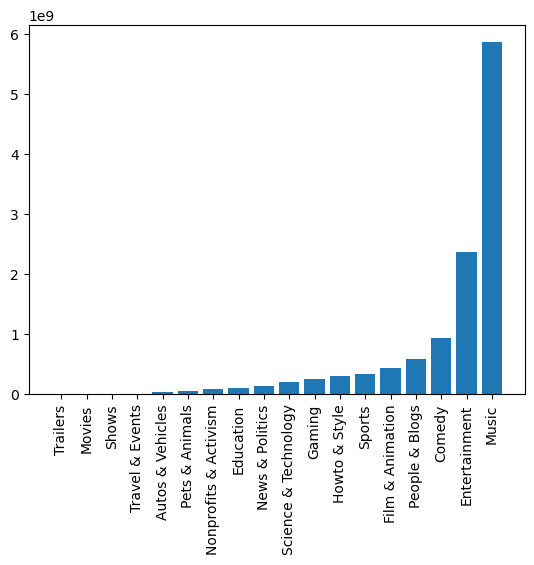

In [62]:
full_data.groupby('category_name')['likes'].sum().sort_values()
likes = full_data.groupby('category_name')['likes'].sum().sort_values()
plt.bar(likes.index, likes)
plt.xticks(rotation='vertical')
plt.show()

### Music and entertainment lead other categories in terms of likes, these are popular categories to use for targeting the majority of people.

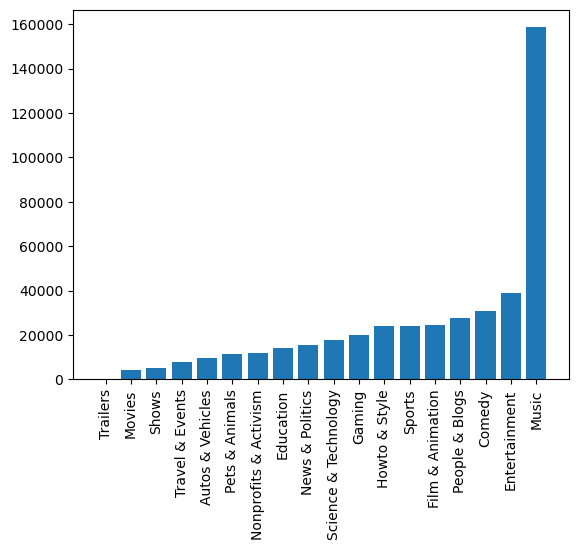

In [63]:
likes_mean = full_data.groupby('category_name')['likes'].mean().sort_values()
plt.bar(likes.index, likes_mean)
plt.xticks(rotation='vertical')
plt.show()

### When comparing the categories by the average like per video, the difference between entertainment and other categories is less noticeable, but music seams even more dominant.

## Audience Engagement

In [207]:
full_data.head()
full_data['like_rate'] = 100 * full_data['likes']/full_data['views']
full_data['dislike_rate'] = 100 * full_data['dislikes']/full_data['views']
full_data['comment_rate'] = 100 * full_data['comment_count']/full_data['views']

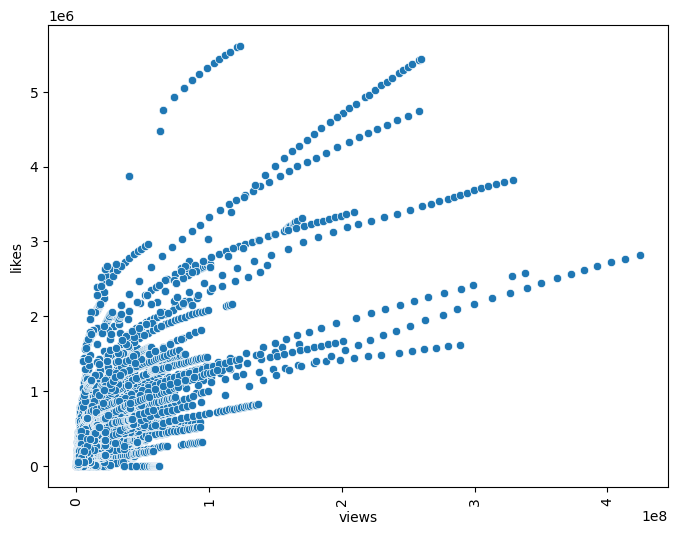

In [212]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='views', y='likes', data=full_data)
plt.xticks(rotation='vertical')
plt.show()

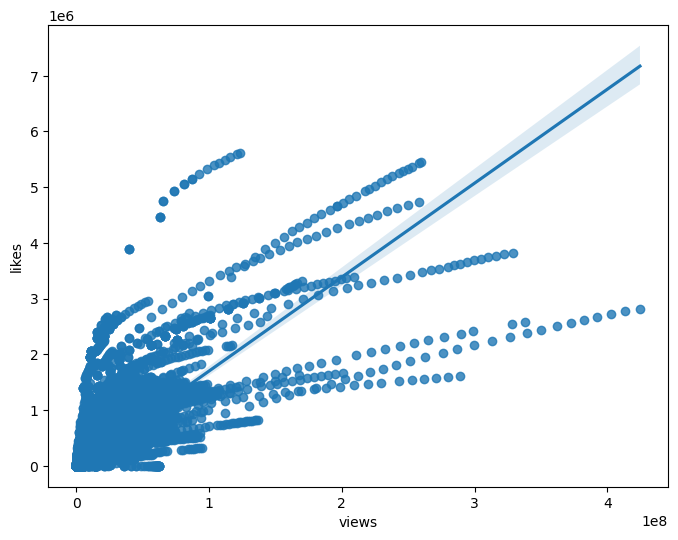

In [214]:
plt.figure(figsize=(8,6))
sns.regplot(data=full_data, x='views', y='likes')
plt.show()


In [215]:
full_data[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

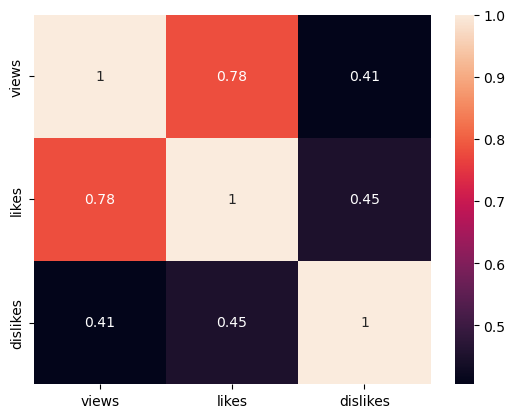

In [217]:
sns.heatmap(full_data[['views','likes','dislikes']].corr(), annot=True)

### The reg plot shows a linear relationship between views and likes. This is further supported by the correlation heat diagram.

## Analyze trending videos

In [64]:
cdf = full_data.groupby('channel_title').agg({'trending_date':'count'}).sort_values(by='trending_date', ascending=False).reset_index()

In [65]:
cdf.rename(columns={'trending_date':'total_videos'}, inplace=True)

In [66]:
import plotly.express as px

In [67]:
fig = px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')
fig.update_layout(width=800, height=400)
fig.update_layout(xaxis=dict(tickangle=30))
fig.update_layout(font=dict(size=8))
fig.show()

### 5 out of the top 7 channels are talk shows. Sports and south asian tv channels also are within the top 20 channels. One might have expected to see a music channel, but since music channels put out videos less frequently, channels that post more often are more likely to have more trending videos.